# The naïve Bayes classifier

Max Collard, May 2021

## 3. Updating our knowledge with data

### Bayes' rule: Updating our knowledge with evidence

Here's 

$\ldots$ (TODO)

> #### Derivation of Bayes' rule from formulas
> By the definition of conditional probability,
>
> $$ \mathrm{Pr}(A \mid B) = \frac{\mathrm{Pr}(A \cap B)}{\mathrm{Pr}(B)} $$
>
> We can also use the definition in the other direction, too:
>
> $$ \mathrm{Pr}(B \mid A) = \frac{\mathrm{Pr}(A \cap B)}{\mathrm{Pr}(A)} $$
>
> If we solve for $\mathrm{Pr}(A \cap B)$ in both of these, we get
>
> $$
\begin{eqnarray*}
\mathrm{Pr}(A \cap B) & = & \mathrm{Pr}(A \mid B)\,\mathrm{Pr}(B) \\
& = & \mathrm{Pr}(B \mid A)\,\mathrm{Pr}(A)
\end{eqnarray*}
$$
>
> If we set these two equal to each other, then we can solve for $\mathrm{Pr}(A \mid B)$:
>
> $$ \mathrm{Pr}(A \mid B) = \mathrm{Pr}(A)\,\frac{\mathrm{Pr}(B \mid A)}{\mathrm{Pr}(B)} $$

### Doing classification with Bayes' rule

For our classification problem, we need to be able to compute the conditional probabilities

$$
\begin{eqnarray*}
\mathrm{Pr}(\textrm{direction} = \textrm{Left} \mid \mathcal{D}) \\
\mathrm{Pr}(\textrm{direction} = \textrm{Right} \mid \mathcal{D}) \\
\end{eqnarray*}
$$

Now that we have Bayes' rule in our toolkit, we can see this from a slightly different perspective. Let's say that we have some *prior belief* about whether the mouse goes left or right, say

$$
\begin{eqnarray*}
\mathrm{Pr}(\textrm{direction} = \textrm{Left}) & = & 0.6 \\
\mathrm{Pr}(\textrm{direction} = \textrm{Right}) & = & 0.4
\end{eqnarray*}
$$

(This mouse likes going left a little more—mice have personalities too.) Then the *conditional probabilities* we are trying to find represent how our *belief* about the direction the mouse went is *updated with knowledge* of the data. In fact, let's just see what happens when we apply Bayes' rule to them:

$$
\begin{eqnarray*}
\mathrm{Pr}(\textrm{direction} = \textrm{Left} \mid \mathcal{D}) & = & \mathrm{Pr}(\textrm{direction} = \textrm{Left})\,\frac{\mathrm{Pr}(\mathcal{D} \mid \textrm{direction} = \textrm{Left})}{\mathrm{Pr}(\mathcal{D})} \\
\mathrm{Pr}(\textrm{direction} = \textrm{Right} \mid \mathcal{D}) & = & \mathrm{Pr}(\textrm{direction} = \textrm{Right})\,\frac{\mathrm{Pr}(\mathcal{D} \mid \textrm{direction} = \textrm{Right})}{\mathrm{Pr}(\mathcal{D})} \\
\end{eqnarray*}
$$

The first important thing to note here is that $\mathrm{Pr}(\mathcal{D})$, the probability that we observed the data itself, **shows up in both equations**; it's just a constant scale factor. But we don't really care about the *actual* probabilities to do classification: we just want to know which one is *the biggest*. This means that the scale factor will have *no impact on our classification result at all*. So, we will completely ignore it. (It's usually really hard to calculate anyway; this saves us a lot of work!)

The second big change we have are the terms

$$
\begin{eqnarray*}
&& \mathrm{Pr}(\mathcal{D} \mid \textrm{direction} = \textrm{Left}) \\
&& \mathrm{Pr}(\mathcal{D} \mid \textrm{direction} = \textrm{Right})
\end{eqnarray*}
$$

How do we interpret these? Well, the *symbols themselves* tell us their story: these represent *the probability of the data **given** which direction the mouse went* —that is, how likely we are to record this particular pattern of neuron firing when the mouse goes *left* or goes *right*.

Let's imagine that these were **always the same**: that is, that there is *no observable difference between the neural activity* seen when the mouse goes left or right. This means that the data are **independent** of the mouse's chosen direction (by definition: knowing the direction has no effect on the neural data at all!) So, in fact, they both must be precisely equal to

$$ \mathrm{Pr}(\mathcal{D}) $$

Well, this means that our expressions above for Bayes' rule become

$$
\begin{eqnarray*}
\mathrm{Pr}(\textrm{direction} = \textrm{Left} \mid \mathcal{D}) & = & \mathrm{Pr}(\textrm{direction} = \textrm{Left})\,\frac{\mathrm{Pr}(\mathcal{D})}{\mathrm{Pr}(\mathcal{D})} \\
& = & \mathrm{Pr}(\textrm{direction} = \textrm{Left}) \\
\mathrm{Pr}(\textrm{direction} = \textrm{Right} \mid \mathcal{D}) & = & \mathrm{Pr}(\textrm{direction} = \textrm{Right})\,\frac{\mathrm{Pr}(\mathcal{D})}{\mathrm{Pr}(\mathcal{D})} \\
& = & \mathrm{Pr}(\textrm{direction} = \textrm{Right})
\end{eqnarray*}
$$

So our *updated beliefs* after gaining our knowledge of the data (the expressions on the left) are just *equal to our prior expectations* —in other words, the data told us nothing above what we already thought!

Let's take a step back though: this is exactly what we would expect! In this thought experiment, we were imagining that the data had the *exact same probabilities* of being observed for either direction. If the data look the same for both classes, then there's no way we could *ever* decipher the direction from the data: it would be like telling the difference between two identical pictures.

<img src="images/6lwrp2xhplg41.jpg" width="300px" align="center" />

Now, let's think about the opposite scenario: let's suppose that when the animal goes to the left, *only neuron 1 fires* (we'll call this pattern of data $\mathcal{D}_1$), and when the mouse goes to the right, *only neuron 2 fires* (call this pattern of data $\mathcal{D}_2$). That is, the two directions have **completely different firing patterns**.

Then,

$$
\begin{eqnarray*}
&& \mathrm{Pr}(\mathcal{D}_1 \mid \textrm{direction} = \textrm{Left}) = 1 \\
&& \mathrm{Pr}(\mathcal{D}_2 \mid \textrm{direction} = \textrm{Left}) = 0
\end{eqnarray*}
$$

because when the animal goes to the left, **we always observe the exact same data pattern**, $\mathcal{D}_1$.

On the flip side,

$$
\begin{eqnarray*}
&& \mathrm{Pr}(\mathcal{D}_1 \mid \textrm{direction} = \textrm{Right}) = 0 \\
&& \mathrm{Pr}(\mathcal{D}_2 \mid \textrm{direction} = \textrm{Right}) = 1
\end{eqnarray*}
$$

So, let's say that we actually run a trial, and when we look at the data, the recording we got shows *all spikes from neuron 1*—we gave this the symbol $\mathcal{D}_1$. How does this update our beliefs? Well, the formulas give us

$$
\begin{eqnarray*}
\mathrm{Pr}(\textrm{direction} = \textrm{Right} \mid \mathcal{D}_1) & = & \mathrm{Pr}(\textrm{direction} = \textrm{Right})\,\frac{\mathrm{Pr}(\mathcal{D}_1 \mid \textrm{direction} = \textrm{Right})}{\mathrm{Pr}(\mathcal{D}_1)} \\
& = & \mathrm{Pr}(\textrm{direction} = \textrm{Right})\,\frac{0}{\mathrm{Pr}(\mathcal{D}_1)} \\
& = & 0 \\
\end{eqnarray*}
$$

Here, it doesn't matter what the prior distribution was—we have **completely eliminated** the possibility of $\textrm{Right}$ being the correct direction. Taking a step back, this is also exactly what we would expect: we said at the beginning that the two directions *always* have *totally different* patterns of neural firing. Because of this, if we see the pattern of firing associated with going left—$\mathcal{D}_1$—then we *absolutely know for sure* that the mouse didn't go right: it had to have gone left!

So we see, the probabilities

$$
\begin{eqnarray*}
&& \mathrm{Pr}(\mathcal{D} \mid \textrm{direction} = \textrm{Left}) \\
&& \mathrm{Pr}(\mathcal{D} \mid \textrm{direction} = \textrm{Right})
\end{eqnarray*}
$$

tell us the **differences in how the data are generated** between the two "classes", $\textrm{Left}$ and $\textrm{Right}$. If there is *no difference* in the way the data are generated, the classification problem is completely unsolvable. On the other hand, if the two directions *always have completely different data every time*, the classification is *perfectly solvable*: you just pick the direction that always makes the data you saw!

Reality, of course, is always in between. Here's one way we could make a setup that falls "in the middle". Let's say we really missed with our electrodes, and neurons 2 through 5 don't do *anything*. But, neuron 1 has a very peculiar property: if the mouse goes to the left, the neuron will fire a single action potential with probability fixed at $p_\textrm{Left} = 0.3$, 30% of the time; and if the mouse goes to the right, the *same* neuron will fire a single action potential with probability $p_\textrm{Right}$. The only really "interesting" data we have to be able to decode from in our experiment is in neuron 1, and even there, all we ever see are either a $0$ (no action potential) or a $1$ (a single spike)—and *even this* is pretty random from trial to trial.

How well do you think we can do at classifying whether the mouse goes left or right from a *single unreliable spike* in a *single neuron*? Let's do the Bayes' rule calculation to see what happens to the classification accuracy if we imagine we have a magic slider in the mouse's brain that lets us vary $p_\textrm{Right}$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

p_left = 0.3

# How many simulations we will run for each model
n_sims = 20000

# Our prior expectation - it looks like the mouse tends to go
# to the left a little more. We'll assume that this expectation
# is *accurate*
prior_left = 0.6
prior_right = 1. - prior_left # "The rest of the time"

# We'll test a whole range of different values for p_right
p_right_test = np.linspace( 0, 1., 20 )

# We want to calculate the number we got correct for each value
n_correct_test = np.zeros( p_right_test.shape )

for i_p in range( p_right_test.size ):
    p_right_cur = p_right_test[i_p]
    
    for i_sim in range( n_sims ):
        ## First let's pick which direction the mouse went
        
        # Pick a random number between 0 and 1
        r = np.random.uniform( low = 0., high = 1. )
        if r < prior_left:
            # For example, if prior_left = 0.6, this happens 60% of the time
            cur_dir = 'left'
        else:
            # This happens "the rest of the time"
            cur_dir = 'right'
        
        ## Next, let's pick whether a spike happened
        n_spikes = 0
        
        # Pick another random number between 0 and 1
        s = np.random.uniform( low = 0., high = 1. )
        if cur_dir == 'left':
            # Spike happens with probability 0.5
            if s < p_left:
                n_spikes = 1
        if cur_dir == 'right':
            # Spike happens with probability p_right_cur
            if s < p_right_cur:
                n_spikes = 1
        
        ## Finally, let's use Bayes' rule based on this data to pick
        # the "best" choice
        if n_spikes == 1:
            # P( 1 | left ) = p_left
            # P( 1 \ right ) = p_right_cur
            # Recall, we completely ignore the denominator
            
            updated_left = prior_left * p_left
            updated_right = prior_right * p_right_cur
        
        elif n_spikes == 0:
            # P( 0 | left ) = 1 - P( 1 | left ) = 1 - p_left
            # P( 0 | right ) = 1 - p_right_cur
            # (These happen "the rest of the time", hence the "1 - ")
            
            updated_left = prior_left * (1 - p_left)
            updated_right = prior_right * (1 - p_right_cur)
            
        if updated_left > updated_right:
            cur_choice = 'left'
        if updated_right > updated_left:
            cur_choice = 'right'
        else:
            # Technically, we have to break ties;
            # I'm going to do it by just choosing left
            # This is *very unlikely* to happen, and so won't really
            # affect anything
            cur_choice = 'left'
        
        ## Let's see how we did!
        if cur_choice == cur_dir:
            # We got it right!
            n_correct_test[i_p] += 1

# Turn the number correct into a *fraction* correct
frac_correct_test = n_correct_test / n_sims

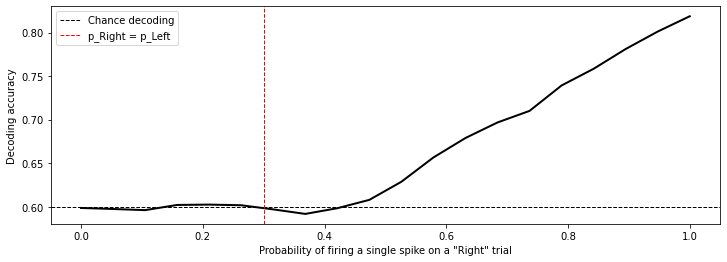

In [2]:
## Plot the results

plt.figure( figsize = (12, 4) )

plt.plot( p_right_test,
          frac_correct_test,
          'k-',
          linewidth = 2)

# Show the chance level, which is the larger of the two priors
frac_correct_chance = np.maximum( prior_left, prior_right )
xl = plt.xlim()
plt.plot( xl,
          [frac_correct_chance, frac_correct_chance],
          'k--',
          linewidth = 1,
          label = 'Chance decoding' )
plt.xlim( xl )

# Show the probability of firing a spike on a "Left" trial, which is fixed
yl = plt.ylim()
plt.plot( [p_left, p_left],
          yl,
          'r--',
          linewidth = 1,
          label = 'p_Right = p_Left' )
plt.ylim( yl )

plt.xlabel( 'Probability of firing a single spike on a "Right" trial' )
plt.ylabel( 'Decoding accuracy' )

plt.legend()

plt.show()

So we see that, if the probability of a spike firing on a $\textrm{Right}$ trial is pretty close to the probability of a spike firing on a $\textrm{Left}$ trial, you really can't do above chance. This makes sense: this is almost identical to the situation we saw before where "the two pictures are the same" for each direction. But if that *one single neuron* fires its *one single action potential* a bit more often on $\textrm{Right}$ trials—say, in 80% of them, versus 30% of $\textrm{Left}$ trials—then you can decode *substantially above chance* (in the case of $p_\textrm{Right} = 0.8$, by eye it looks like $\sim$75% decoding accuracy; that's solidly above our prior of 60%, which should define chance).

We just showed that you can get classifier performance out of **a single action potential from a single neuron**, even when that neuron is pretty unreliable. That's pretty neat!

---

You can **prove** that the classifier built this way—by using Bayes' rule and picking the direction, or "*class*", with the highest probability given the data—is **optimal**, in the sense that it gives you **the highest possible classification accuracy** compared with any other classifier based on the data you could possibly dream of. This optimal classifier is known as the **Bayes classifier**.

### Modeling the data

... in most cases, especially in biology, there is **no way to know the truth about how the data are generated**; that is, we can never *truly know* the probabilities

$$
\begin{eqnarray*}
&& \mathrm{Pr}(\mathcal{D} \mid \textrm{direction} = \textrm{Left}) \\
&& \mathrm{Pr}(\mathcal{D} \mid \textrm{direction} = \textrm{Right})
\end{eqnarray*}
$$

This knowledge was **explicitly necessary** to make the "optimal" Bayes classifier; so, in general, the Bayes classifier is **impossible to obtain**.

Instead, we will have to satisfy ourselves with coming up with some kind of **imperfect model** for how *we think* the data were generated; let's call the probabilities in this model

$$
\begin{eqnarray*}
&& \mathcal{M}(\mathcal{D} \mid \textrm{direction} = \textrm{Left}) \\
&& \mathcal{M}(\mathcal{D} \mid \textrm{direction} = \textrm{Right})
\end{eqnarray*}
$$